# Stock Analysis 

Github Link:
https://github.com/TrangNguyen95/DataVisualization-

The datasets that were used in this project are listed as follow:
    - All_Stocks data from January 2006 to December 2017 
    - Sector data of the stocks in the All_Stocks dataset
    - Google stock data from January 2006 to December 2017 
    - Cisco stock data from January 2006 to December 2017 

# Import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

2.2.3


In [4]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Get the Data

In [5]:
Stocks=pd.read_csv('All_Stocks-06-18.csv')

In [6]:
Sector=pd.read_csv('Sector.csv')

In [7]:
Stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [8]:
Sector.head()

,Name,Sector
0,AABA,Financial
1,AAPL,Technology
2,AMZN,Consumer Discretionary
3,AXP,Financial
4,BA,Industrials


In [9]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


# Combine Data

In [10]:
Stocks_df=pd.DataFrame.merge(Stocks,Sector,how='right',on='Name')


In [11]:
Stocks_df['Date']=pd.to_datetime(Stocks_df['Date'])
Stocks_df['Year'] = Stocks_df['Date'].dt.year
Stocks_df['Month'] = Stocks_df['Date'].dt.month
Month=pd.DataFrame({'Month':[1,2,3,4,5,6,7,8,9,10,11,12],'MonthName':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})
Stocks_df1=pd.DataFrame.merge(Stocks_df,Month,on='Month',how='left')

# Explore Data 

##### (1) What stocks do we have in the dataset?

In [12]:
Stocks_df1['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [13]:
Stocks_df1['Name'].nunique()

31

In [14]:
Stocks_df1.head()

,Date,Open,High,Low,Close,Volume,Name,Sector,Year,Month,MonthName
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,Technology,2006,1,Jan
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,Technology,2006,1,Jan
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,Technology,2006,1,Jan
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,Technology,2006,1,Jan
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,Technology,2006,1,Jan


##### (2) What are the average prices of the stocks?

In [15]:
Stocks_df2=Stocks_df1.groupby(['Name','Sector']).agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).round({'Open':2,'High':2,'Low':2,'Close':2}).reset_index()
Stocks_df2.sort_values(['Close'],ascending=False)

,Name,Sector,Open,High,Low,Close
10,GOOGL,Technology,428.20,431.84,424.13,428.04
2,AMZN,Consumer Discretionary,299.34,302.37,296.04,299.38
11,GS,Financial,165.57,167.55,163.60,165.61
13,IBM,Technology,145.52,146.68,144.47,145.62
19,MMM,Technology,111.78,112.62,110.99,111.86
4,BA,Industrials,101.48,102.37,100.50,101.52
7,CVX,Energy,94.59,95.44,93.72,94.63
27,UTX,Industrials,84.89,85.58,84.20,84.91
18,MCD,Consumer Staples,84.40,84.99,83.86,84.45
30,XOM,Energy,80.97,81.66,80.28,81.01


The table in (2) shows that Google (GOOGL) has the highest stock price and Cisco (CSCO) has the lowest stock price.  

##### (3)  What are Google stock returns?

In [16]:
Google=Stocks_df1[Stocks_df1['Name'].str.contains('GOOGL')]
Google1=pd.pivot_table(Google,values='Volume',index=['Year','Month'],columns='Name').round({'Volume':2}).reset_index()
Google2=pd.pivot_table(Google,values='Close',index=['Year','Month'],columns='Name').round({'Volume':2}).reset_index()
Google3=pd.DataFrame.merge(Google1,Google2,on=['Year','Month'],how='outer').round({'GOOGL_x':2,'GOOGL_y':2})

# Graph

##### (4) What is the distribution of the stock prices?

Text(0.5,0,'Price')

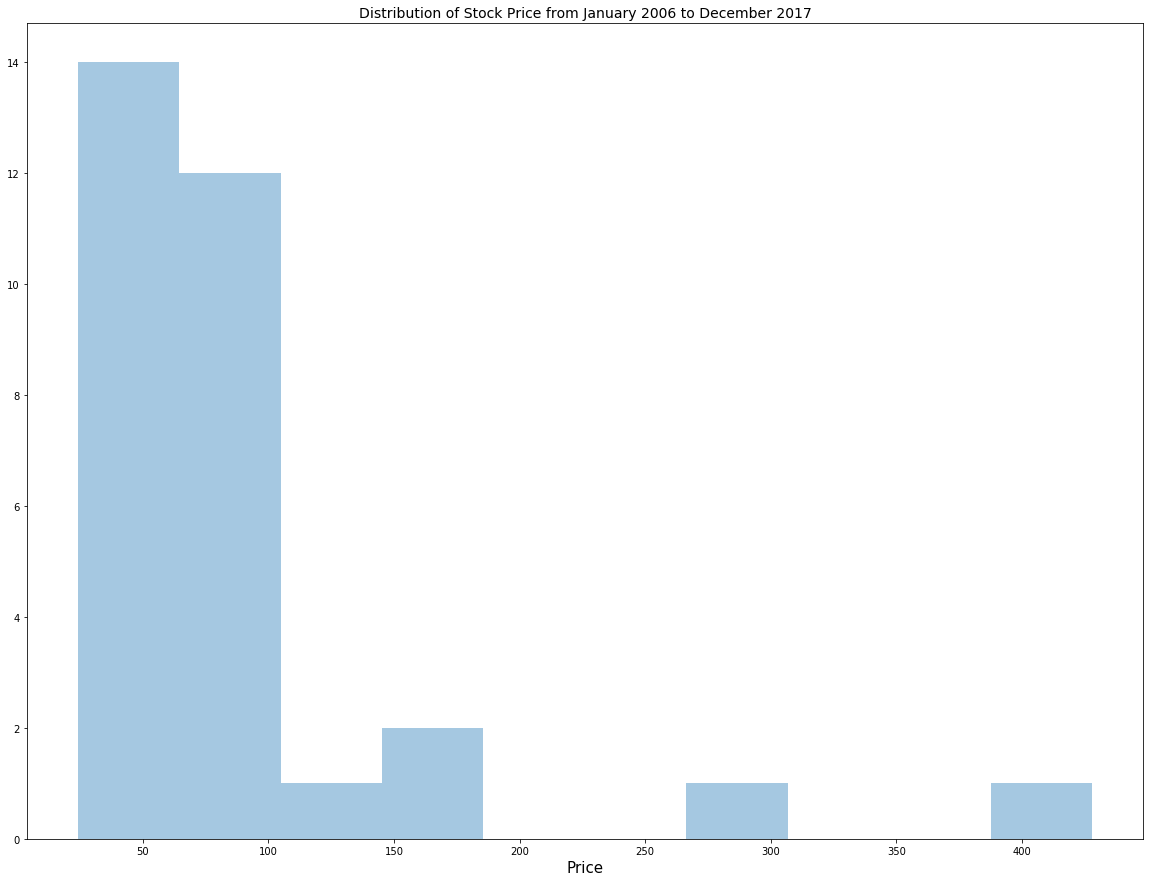

In [27]:
sns.distplot(Stocks_df2['Close'],kde=False,bins=10).set_title("Distribution of Stock Price from January 2006 to December 2017",size=14)
plt.xlabel('Price',fontsize=15)

From this graph and the table above, most stocks in the dataset have the closing price from 25 to 100 dollars. 


##### (5) What are the monthly closing price of the stocks with highest and lowest prices?

In [18]:
GOOGL=pd.read_csv('GOOGL_06-18.csv')
CSCO=pd.read_csv('CSCO_06-18.csv')

In [19]:
GOOGL['Date']=pd.to_datetime(GOOGL['Date'])
CSCO['Date']=pd.to_datetime(GOOGL['Date'])

In [20]:
GOOGL['Year'] = GOOGL['Date'].dt.year
GOOGL['Month'] = GOOGL['Date'].dt.month
CSCO['Year'] = CSCO['Date'].dt.year
CSCO['Month'] = CSCO['Date'].dt.month

In [21]:
Stocks_Mon=Stocks_df1.groupby(['Name','Sector','Month','Year']).agg({'Close':'mean','Volume':'mean'}).round({'Close':2,'Volume':2}).reset_index()
GOOGL_Mon=GOOGL.groupby(['Month','Year']).agg({'Close':'mean'}).reset_index()

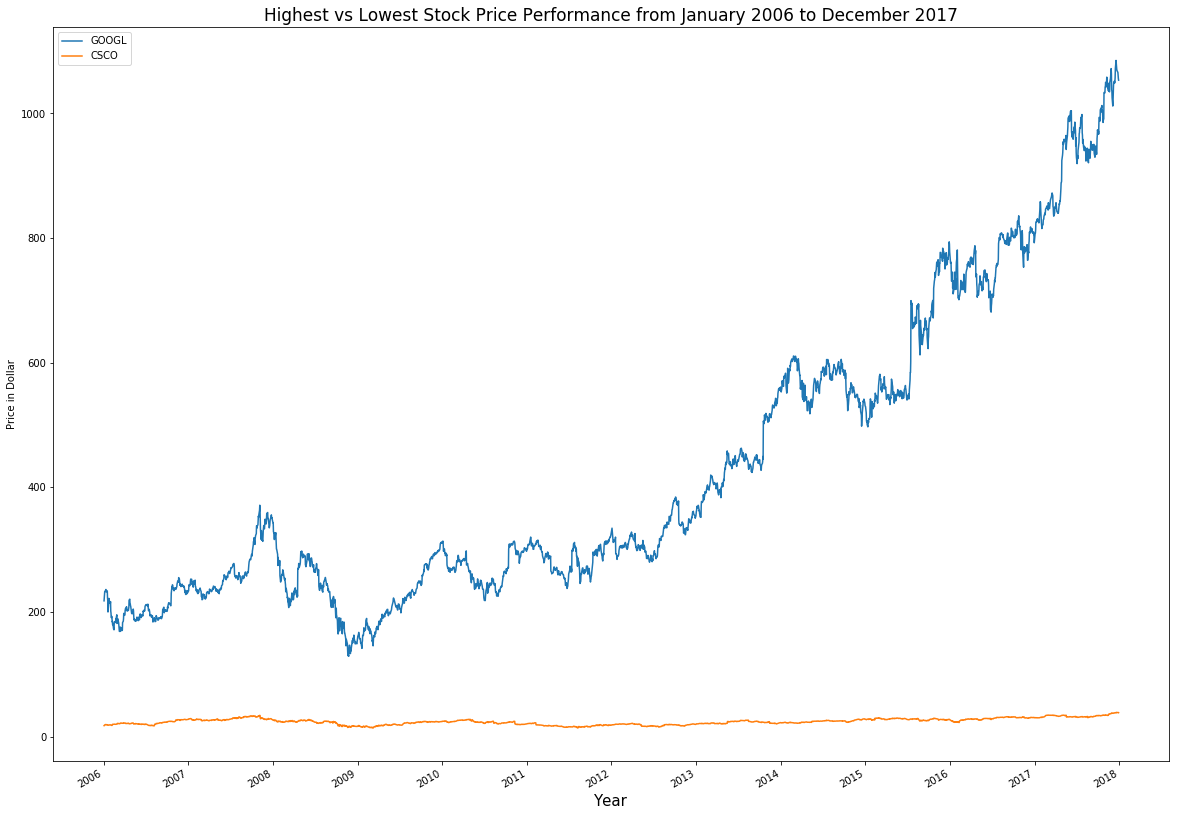

In [23]:
plt.plot(GOOGL['Date'],GOOGL['Close'],label='GOOGL')
plt.plot(CSCO['Date'],CSCO['Close'],label='CSCO')
plt.title('Highest vs Lowest Stock Price Performance from January 2006 to December 2017',fontsize=17)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.xlabel('Year',fontsize=15)
plt.ylabel('Price in Dollar',fontsize=10)
plt.rcParams["figure.figsize"] = (20,15)
plt.draw()

From the graph, we can see that Cisco stock prices are more stable comparing to Google stock prices.

##### (6) What are the monthly trading activities of the  sectors?

In [28]:
Stock_Sector_df=Stocks_df1.groupby(['Sector','Month','Year','MonthName']).agg({'Close':'mean','Volume':'mean'}).round({'Volume':2,'Close':2}).reset_index()
Stock_Sector_df['Sector'].nunique()
Stock_Sector_df.head()

,Sector,Month,Year,MonthName,Close,Volume
0,Consumer Discretionary,1,2006,Jan,30.50,11984331.80
1,Consumer Discretionary,1,2007,Jan,31.25,11653360.19
2,Consumer Discretionary,1,2008,Jan,38.40,17886524.94
3,Consumer Discretionary,1,2009,Jan,27.28,14942690.90
4,Consumer Discretionary,1,2010,Jan,50.67,12538632.59


In [29]:
Stock_SectorV=pd.pivot_table(Stock_Sector_df,values='Volume',index=['Year','Month','MonthName'],columns='Sector').round({'Volume':2}).reset_index()
Stock_SectorP=pd.pivot_table(Stock_Sector_df,values='Close',index=['Year','Month','MonthName'],columns='Sector').round({'Close':2}).reset_index()
Stock_SectorV.head()

Sector,Year,Month,MonthName,Consumer Discretionary,Consumer Staples,Energy,Financial,Healthcare,Industrials,Technology,Telecom
0,2006,1,Jan,11984331.80,11832172.50,15218612.50,12132296.31,16169598.75,11315502.50,75562643.42,19385415.00
1,2006,2,Feb,11273851.64,9929398.68,14601597.37,8804279.71,13605917.11,9162602.63,68687985.88,12548142.11
2,2006,3,Mar,9016311.15,9662207.61,13745358.70,8857008.98,11155777.17,8893321.74,68250406.35,10847117.39
3,2006,4,Apr,7768426.63,9598905.26,12989597.37,8745081.38,14118234.21,9663436.84,68974085.86,9581347.37
4,2006,5,May,11318351.00,11707098.86,14919754.55,9530775.25,15028642.05,8808210.23,61761233.12,9965440.91


Text(0.5,1,'Monthly Trading Activity from January 2006 to December 2017')

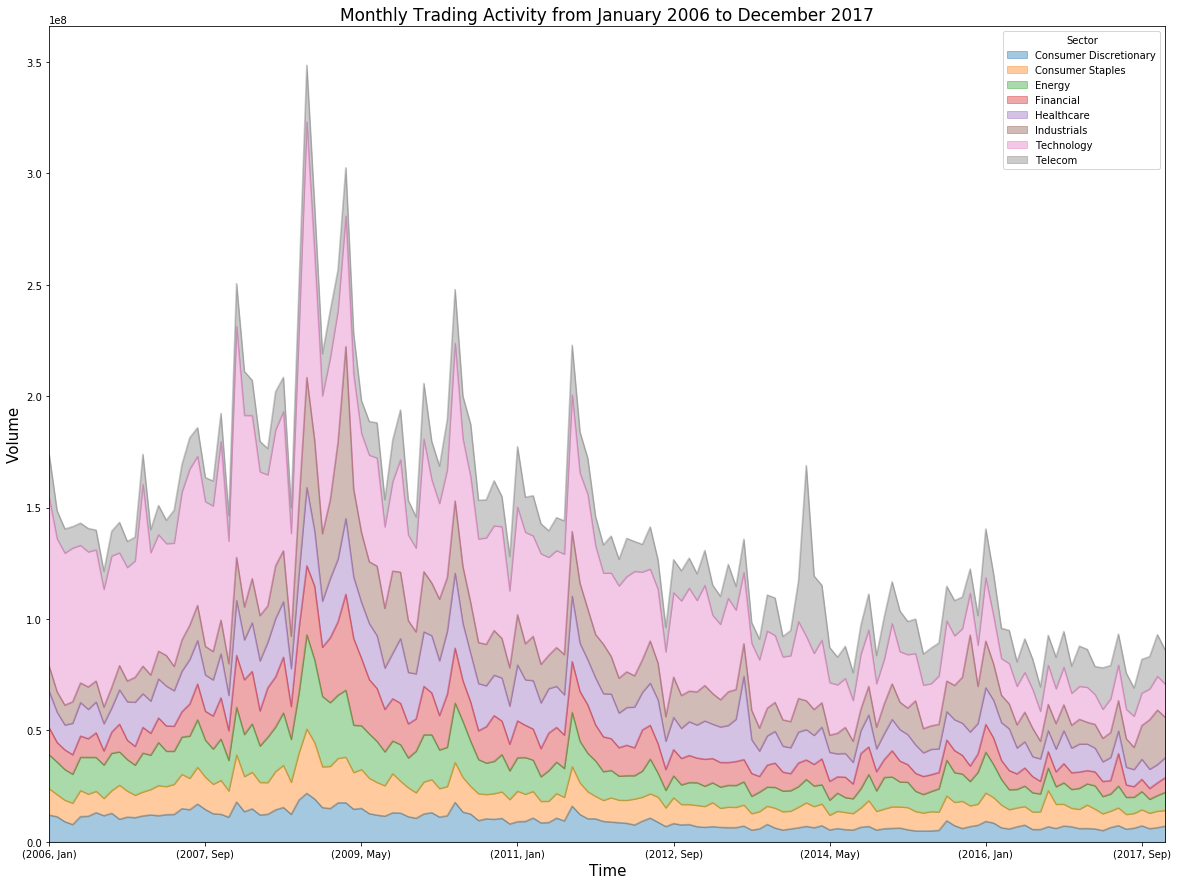

In [30]:
Stock_SectorV4=Stock_SectorV.drop(['Month'],axis=1).set_index(['Year','MonthName'])
Stock_SectorV4.plot.area(alpha=0.4)
plt.rcParams["figure.figsize"] = (20,15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Volume',fontsize=15)
plt.title('Monthly Trading Activity from January 2006 to December 2017',fontsize=17)

When looking at the stock trading graph, we can see that the stock trading volume from 2006 to end of 2017 reached its peak in 2008 before the stock market crash in September 2008 and the traded Volume hasn't been that high since then.

##### (7) What are the correlations across all sectors?

In [31]:
Stock_SectorP7=Stock_SectorP.drop(['Year','Month'],axis=1)
Stock_SectorV7=Stock_SectorV.drop(['Year','Month'],axis=1)


Text(0.5,1,'Correlation Between the Sectors from January 2006 to December 2017')

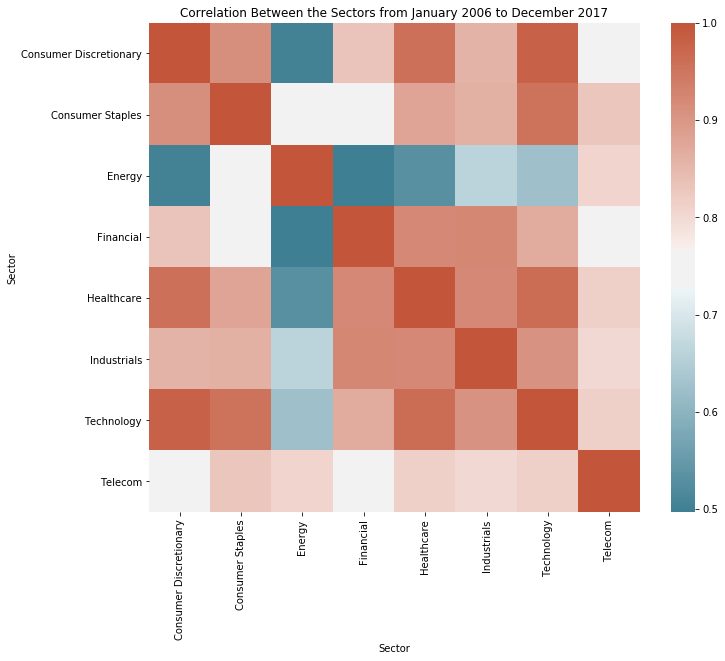

In [32]:
corr = Stock_SectorP7.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, sep=20,as_cmap=True)
ax=sns.heatmap(corr,cmap=cmap)
ax.set_title('Correlation Between the Sectors from January 2006 to December 2017')

Text(908.571,0.5,'Sector')

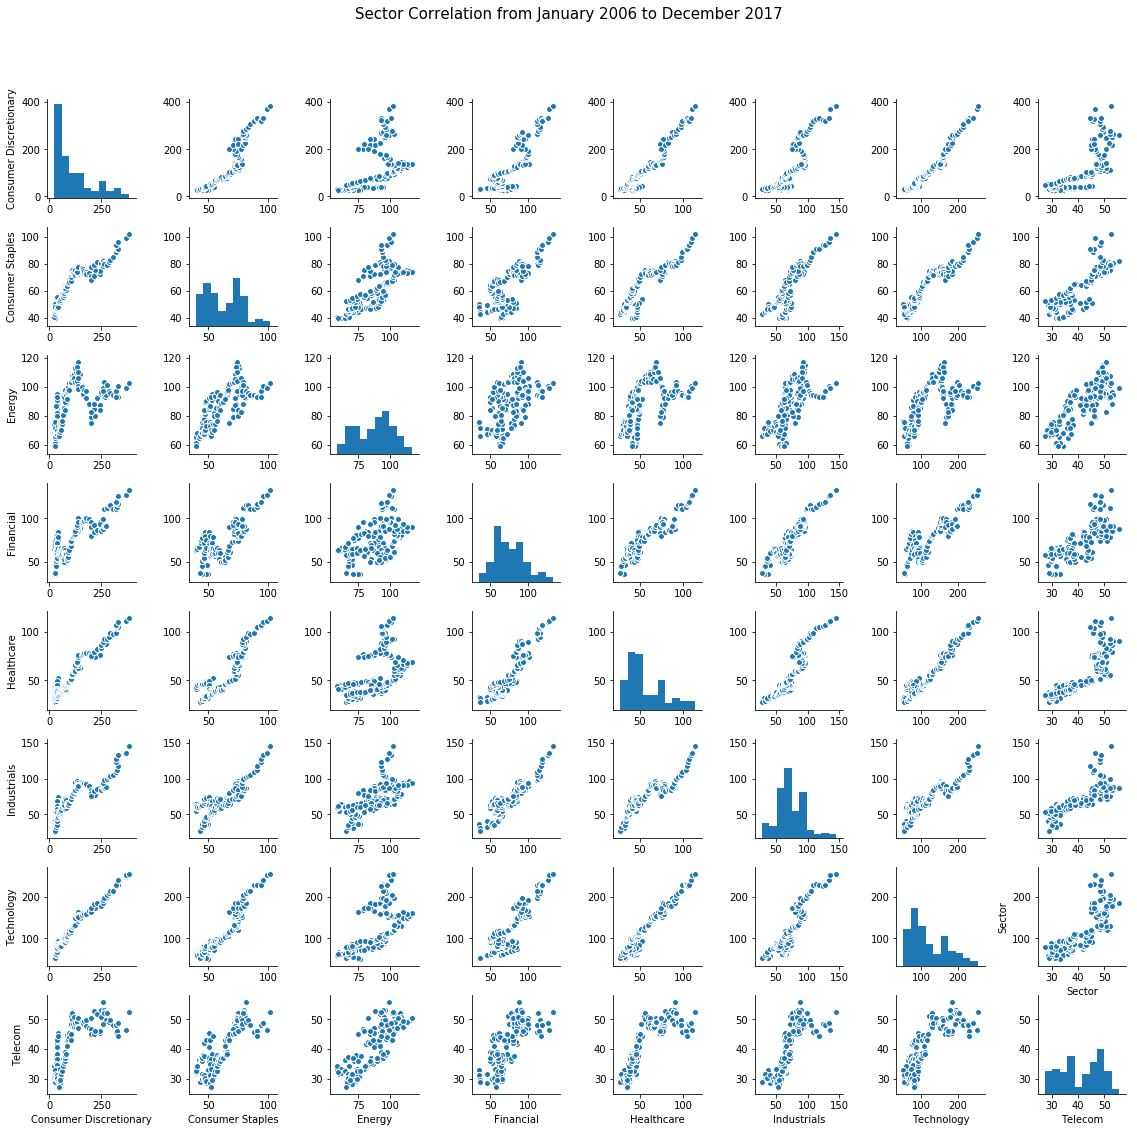

In [33]:
g7=sns.pairplot(Stock_SectorP7,size=2)
plt.subplots_adjust(top=0.9)
g7.fig.suptitle('Sector Correlation from January 2006 to December 2017',size=15)
plt.xlabel('Sector')
plt.ylabel('Sector')

Overall, the sectors have positive correlations with each other. However, the following pairs have higher correlation comparing to the rest. 
    - Technology and Consumer Discretionary. 
    - Technology and Healthcare 
With technology becomes more and more popular in most part of our life, it is reasonable to see the high correlation between the price of this sector and the others. On the contrary, Energy stock price seems to have the weakest correlation with the other sector. Having both the heat map and the pairplot help us to quickly scan for the appealing relationship and the correlation trend of different pairs of sectors.

##### (8) What is the relationship between highest stock prices of Technology and the Consumer Discretionary sectors?


In [34]:
Tech_Big=Stocks_df2[Stocks_df2['Sector'].str.contains('Technology')].sort_values(['Close'],ascending=False).head(n=1)
Tech_Big

,Name,Sector,Open,High,Low,Close
10,GOOGL,Technology,428.2,431.84,424.13,428.04


In [35]:
ConD_Big=Stocks_df2[Stocks_df2['Sector'].str.contains('Consumer Discretionary')].sort_values(['Close'],ascending=False).head(n=1)
ConD_Big

,Name,Sector,Open,High,Low,Close
2,AMZN,Consumer Discretionary,299.34,302.37,296.04,299.38


In [36]:
TechConD_Big=Stocks_df1[Stocks_df1['Name'].str.contains('GOOGL|AMZN')]
TechConD_Big1=pd.pivot_table(TechConD_Big,values='Close',index=['Year','Month'],columns='Name').round({'Volume':2}).reset_index()


Text(27.125,0.5,'Amazon')

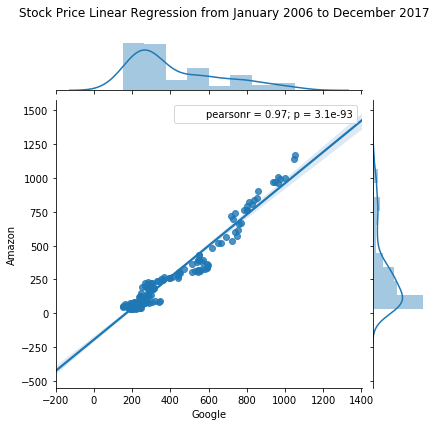

In [37]:
g8=sns.jointplot(x='GOOGL',y='AMZN',data=TechConD_Big1,kind='reg')
plt.subplots_adjust(top=0.9)
g8.fig.suptitle('Stock Price Linear Regression from January 2006 to December 2017')
plt.xlabel('Google')
plt.ylabel('Amazon')

With alpha of 0.01 and the p-value being 3.1e-93 (less than alpha of 0.01), we can conclude that there is a significant positive relationship between prices of Google and Amazon. 

##### (9) What is the relationship between the highest stock returns of Technology and the Consumer Discretionary sectors ?

In [38]:
TechConD_Big2=pd.pivot_table(TechConD_Big,values='Close',index=['Year','Month'],columns='Name').round({'Volume':2}).reset_index()
TechConD_Big2['GReturn']=TechConD_Big2['GOOGL'].pct_change()
TechConD_Big2['AReturn']=TechConD_Big2['AMZN'].pct_change()

Text(27.125,0.5,'Amazon')

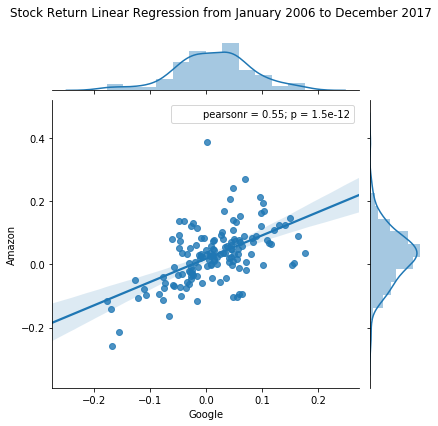

In [39]:
g9=sns.jointplot(x='GReturn',y='AReturn',data=TechConD_Big2,kind='reg')
plt.subplots_adjust(top=0.9)
g9.fig.suptitle('Stock Return Linear Regression from January 2006 to December 2017')
plt.xlabel('Google')
plt.ylabel('Amazon')

With alpha of 0.01 and the p-value being 1.5e-12 (less than alpha of 0.01), we can conclude that there is a significant positive relationship between return of Google and Amazon stocks. 

##### (10) What is the relationship between returns of the Technology and the Healthcare biggest stock?

In [40]:
Heal_Big=Stocks_df2[Stocks_df2['Sector'].str.contains('Healthcare')].sort_values(['Close'],ascending=False).head(n=1)
Heal_Big

,Name,Sector,Open,High,Low,Close
15,JNJ,Healthcare,80.91,81.42,80.4,80.94


In [41]:
TechHeal_Big=Stocks_df1[Stocks_df1['Name'].str.contains('GOOGL|JNJ')]
TechHeal_Big1=pd.pivot_table(TechHeal_Big,values='Close',index=['Year','Month'],columns='Name').round({'Volume':2}).reset_index()


Text(27.125,0.5,'Johnson & Johnson')

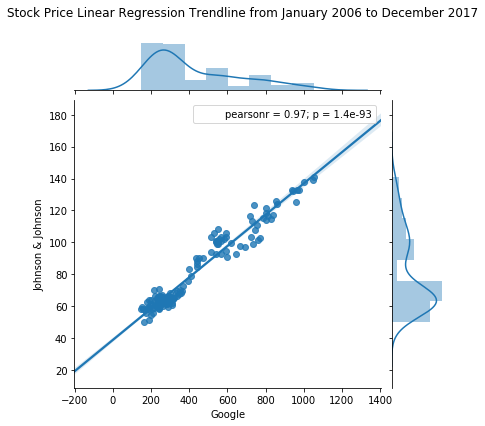

In [42]:
g10=sns.jointplot(x='GOOGL',y='JNJ',data=TechHeal_Big1,kind='reg')
plt.subplots_adjust(top=0.9)
g10.fig.suptitle('Stock Price Linear Regression Trendline from January 2006 to December 2017')
plt.xlabel('Google')
plt.ylabel('Johnson & Johnson')

With alpha of 0.01 and the p-value being 1.4e-93 (less than alpha of 0.01), we can conclude that there is a significant positive relationship between prices of Google and Johnson & Johnson. 

##### (11) What is the relationships between Google return and volume from January 2006 to December 2017?

Text(27.125,0.5,'Return')

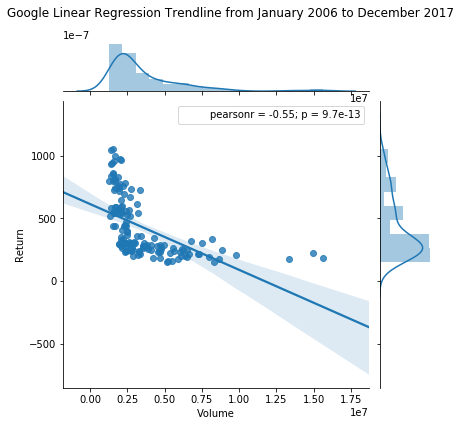

In [43]:
g11=sns.jointplot(x='GOOGL_x',y='GOOGL_y',data=Google3,kind='reg')
plt.subplots_adjust(top=0.9)
g11.fig.suptitle('Google Linear Regression Trendline from January 2006 to December 2017')
plt.xlabel('Volume')
plt.ylabel('Return')

With alpha of 0.01 and the p-value being 9.7e-13 (less than alpha of 0.01), we can conclude that there is a significant negative relationship between return and volume of Google stocks. 

##### (12) Is the Halloween indicator (Sell in May and go away investment strategy) reflected in the stock data from January 2006 to December 2017?

In [44]:
Stock_Mon=Stocks_df1.groupby(['Month','MonthName']).agg({'Volume':'mean'}).round({'Volume':2}).reset_index()
Stock_Mon.iplot(kind='bar',x='MonthName',y='Volume',xTitle="Month",yTitle="Volume",title="Monthly Trading Volume from January 2006 to December 2017")

According to the bar graph above, we can't say for sure that people follow the sell in May and go away investment strategy. However, we can see that investors are active in January.   